<a href="https://colab.research.google.com/github/leticiagomescs/QuarentenaDados-Alura/blob/master/Desafios_semana_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula_01 **Quarentena Dados**

#**Desafios**

## Bibliotecas Python

In [0]:
# Importando as bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt

## Conjunto de Dados

Importando o conjunto de dados:

In [0]:
# Filmes:

filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Avaliações:

avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.columns = ['usuarioId','filmeId','nota','timestamp']
avaliacoes.head()

,usuarioId,filmeId,nota,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### **Desafio 1** do Paulo Silveira

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
avaliacoes.columns = ['usuarioId','filmeId','notaMedia','timestamp']
avaliacoes.columns

Index(['usuarioId', 'filmeId', 'notaMedia', 'timestamp'], dtype='object')

In [0]:
media_notas_por_filme = avaliacoes.groupby('filmeId')['notaMedia'].mean() 
media_notas_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notaMedia, dtype: float64

In [0]:
filmes_com_media = filmes.join(media_notas_por_filme, on='filmeId')
filmes_com_media.sort_values('notaMedia', ascending=False)

,filmeId,titulo,generos,notaMedia
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [0]:
filmes_com_media.isnull().any()

filmeId      False
titulo       False
generos      False
notaMedia     True
dtype: bool

In [0]:
aux = filmes_com_media.loc[filmes_com_media['notaMedia'].isnull()] 
aux.head()

,filmeId,titulo,generos,notaMedia
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN


In [0]:
filmes_sem_avaliacao = pd.DataFrame(aux['titulo'])
filmes_sem_avaliacao

,titulo
816,"Innocents, The (1961)"
2211,Niagara (1953)
2499,For All Mankind (1989)
2587,"Color of Paradise, The (Rang-e khoda) (1999)"
3118,I Know Where I'm Going! (1945)
4037,"Chosen, The (1981)"
4506,"Road Home, The (Wo de fu qin mu qin) (1999)"
4598,Scrooge (1970)
4704,Proof (1991)
5020,"Parallax View, The (1974)"


In [0]:
qtd_filmes_sem_avaliacao = filmes_sem_avaliacao.titulo.count()

print('Quantidade de filmes sem avaliação: ', qtd_filmes_sem_avaliacao)

Quantidade de filmes sem avaliação:  18


In [0]:
if qtd_filmes_sem_avaliacao == 18:
  print('Boa Paulo, você acertou!')
else:
  print('Conta denovo aí paulo!')

Boa Paulo, você acertou!


###**Desafio 2** do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
filmes_com_media.columns 


Index(['filmeId', 'titulo', 'generos', 'notaMedia'], dtype='object')

In [0]:
filmes_com_media.columns = ['filmeId', 'titulo', 'generos', 'nota_media']

In [0]:
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


###**Desafio 3** do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
qtd_avaliacoes_filme = avaliacoes.groupby('filmeId')['usuarioId'].count()
filmes_num_avaliacoes = filmes_com_media.join(qtd_avaliacoes_filme,on='filmeId')
filmes_num_avaliacoes.rename(columns={'usuarioId': 'quantidade_avaliacoes'})

,filmeId,titulo,generos,nota_media,quantidade_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


###**Desafio 4** do do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filmes_com_media['nota_media'] = round(filmes_com_media['nota_media'], 2)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


###**Desafio 5** do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
# Descobrindo os tipos de gêneros dos filmes:

tipos_de_generos = filmes['generos'].str.get_dummies("|")
tipos_de_generos.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [0]:
# Qantidade de gêneros: 

print ('Quantidade de gêneros diferentes presentes no dataset: ',len(tipos_de_generos.columns))

Quantidade de gêneros diferentes presentes no dataset:  20


###**Desafio 6** da Thais André

Contar o número de aparições de cada genero.

In [0]:
# Calculando quantas vezes cada gênero aparece no conjunto de dados:

qtd_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
qtd_genero
df = pd.DataFrame(qtd_genero)
df

,0
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978
Fantasy,779


###**Desafio** 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

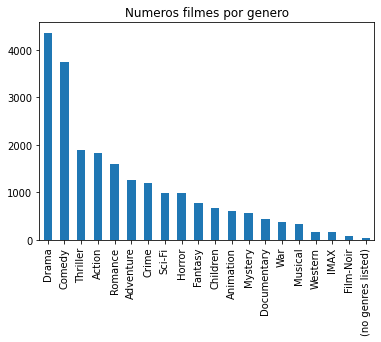

In [0]:
qtd_genero.plot(kind='bar',title='Numeros filmes por genero')

Text(0, 0.5, '')

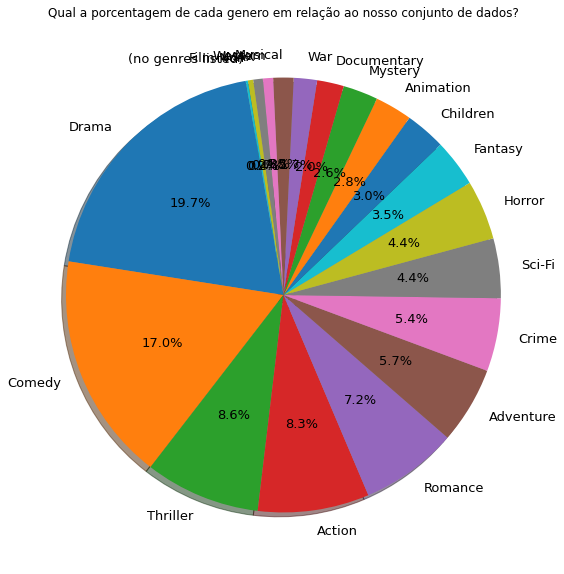

In [0]:
# Gerar o gráfico de pizza:
qtd_genero.plot.pie(title='Qual a porcentagem de cada genero em relação ao nosso conjunto de dados?',fontsize=13, shadow=True,startangle=100,autopct='%1.1f%%',
figsize=(10,10)).set_ylabel('')

# Mas para muitos valores, esse gráfico não é tão eficiente como mostra a figura abaixo.